# Kaggle Titanic Competition

[타이타닉 캐글 링크](https://www.kaggle.com/competitions/titanic)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. 개요

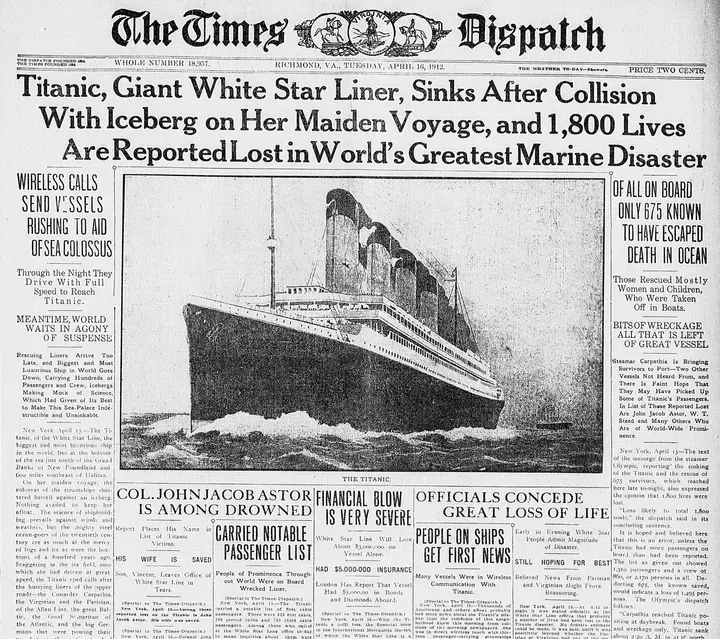

In [2]:
from IPython.display import Image
Image("/Users/gyol/Documents/Kaggle/titanic 2/titanic newspaper.jpg")

침몰을 알리는 1912년 4월 16일자 《The Times Dispatch newspaper》의 기사.  
[[사진 출처 링크] 타이타닉호 침몰 사고 - 나무위키](https://namu.wiki/w/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89%ED%98%B8%20%EC%B9%A8%EB%AA%B0%20%EC%82%AC%EA%B3%A0)

1912년 4월 10일 영국의 **Southhampton**에서 출항해 프랑스의 **Cherbourg**와 아일랜드의 **Queenstown**에 기항한 후 4월 17일 아침 미국 뉴욕에 도착 할 예정이었던 타이타닉 호는 4월 14일 빙산과 충돌해 4월 15일 침몰했다. 침몰하는 과정에서 많은 사상자를 내었던 이 사건을 Kaggle에서 제공한 데이터를 통해 분석을 해보겠다.

In [3]:
train=pd.read_csv('/Users/gyol/Documents/Kaggle/titanic 2/train.csv')
test=pd.read_csv('/Users/gyol/Documents/Kaggle/titanic 2/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 용어 정리
* Survived :0 =사망, 1=생존
* Pclass : 티켓 클래스 1=1st, 2=2nd, 3=3rd
* Sibsp : 타이타닉에 동승한 형제, 자매, 배우자 수
* Parch : 타이타닉에 동승한 부모, 자녀 수
* Ticket : 티켓 번호
* Fare : 운임
* Cabin : 객실 번호
* embarked : 승선 항구 C=Cherbourg, Q=Queenstown, S=Southhampton

## 2. 데이터 분석

In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

177개의 Age 데이터, 687개의 Cabin 데이터, 2개의 Embarked 데이터가 없음을 확인할 수 있다.

In [9]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

총 891명 중 342명이 생존했다. **생존률 : 38.4%**  
<hr>  
이제 세부적인 생존률을 살펴보겠다. 우선 분류가 쉽게 되어 있는 자료부터 살펴보겠다.

In [10]:
def sur_rate(feature):
    survived=train[train['Survived']==1][feature].value_counts()
    dead=train[train['Survived']==0][feature].value_counts()
    survival_rate = round((survived / (survived + dead)) * 100,1)
    result_df = pd.DataFrame({
        '생존율(%)': survival_rate,
        '생존자 수': survived,
        '사망자 수': dead,
        '합계': train[feature].value_counts()
    })
    return result_df.fillna(0)

### 2-1. 티켓 클래스

In [11]:
sur_rate('Pclass')

,생존율(%),생존자 수,사망자 수,합계
1,63.0,136,80,216
2,47.3,87,97,184
3,24.2,119,372,491


높은 등급의 티켓을 보유할수록 생존율이 높아지는 모습을 보였다. 따라서 티켓의 등급이 높아질 수록 생존 확률이 높아진다는 가설을 세울 수 있다.

### 2-2. 성별

In [12]:
sur_rate('Sex')

,생존율(%),생존자 수,사망자 수,합계
female,74.2,233,81,314
male,18.9,109,468,577


여성 탑승자의 생존 확률은 74.2%였고, 남성 탑승자의 생존 확률은 18.9%였다. 따라서 성별은 생존 확률에 큰 영향을 끼쳤다는 가설을 세울 수 있다.

### 2-3. 가족 수

In [13]:
sur_rate('SibSp')

,생존율(%),생존자 수,사망자 수,합계
0,34.5,210.0,398,608
1,53.6,112.0,97,209
2,46.4,13.0,15,28
3,25.0,4.0,12,16
4,16.7,3.0,15,18
5,0.0,0.0,5,5
8,0.0,0.0,7,7


1~2명 사이의 형제,자매,배우자랑 동승했던 탑승자가 좀 더 높은 생존율을 보였다. 하지만 3,4명이 되면 생존율이 줄어서 가설을 세우기에는 어려운 부분이 있다.

In [14]:
sur_rate('Parch')

,생존율(%),생존자 수,사망자 수,합계
0,34.4,233.0,445,678
1,55.1,65.0,53,118
2,50.0,40.0,40,80
3,60.0,3.0,2,5
4,0.0,0.0,4,4
5,20.0,1.0,4,5
6,0.0,0.0,1,1


3~6명의 아이와 부모를 데리고 있는 탑승자는 그 수가 적어서 판단이 어렵다. 하지만 혼자 탑승한 인원보다는 부모와 아이가 있는 사람이 더욱 생존율이 높다는 가설을 세울 수 있다. 두 데이터는 가족 인원을 나타내기에 합쳐서 확인해보겠다.

In [15]:
train['Fam']=train['Parch']+train['SibSp']
test['Fam']=test['Parch']+test['SibSp']

In [16]:
sur_rate('Fam')

,생존율(%),생존자 수,사망자 수,합계
0,30.4,163.0,374,537
1,55.3,89.0,72,161
2,57.8,59.0,43,102
3,72.4,21.0,8,29
4,20.0,3.0,12,15
5,13.6,3.0,19,22
6,33.3,4.0,8,12
7,0.0,0.0,6,6
10,0.0,0.0,7,7


타이타닉 호에 혼자 탑승한 탑승객은 낮은 생존율을 보였고, 1~3명의 가족이 있는 탑승객은 비교적 높은 생존율을 보였다. 그보다 더 많은 인원의 가족과 탑승한 인원들은 낮은 생존율을 보였다.

### 2-4. 승선지

In [17]:
sur_rate('Embarked')

,생존율(%),생존자 수,사망자 수,합계
S,33.7,217,427,644
C,55.4,93,75,168
Q,39.0,30,47,77


**Cherbourg**에서 승선한 탑승객이 좀 더 높은 생존율을 보였다. 대부분 탑승자가 Southhampton에서 출발하였기에, 결측치는 S로 채우겠다.

In [18]:
train['Embarked']=train['Embarked'].fillna('S')
test['Embarked']=test['Embarked'].fillna('S')
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### 2-5. 나이

나이는 너무 많은 분류값을 가지고 있고, 결측치가 존재하기에 우선 결측치를 채운 뒤 범주를 나누기 위해 한번 그래프를 그려보겠다.

In [19]:
train['Age'].fillna(train.groupby("Sex")["Age"].transform('median'),inplace=True)
test['Age'].fillna(test.groupby("Sex")["Age"].transform('median'),inplace=True)

결측치는 각 성별의 중앙값으로 채웠다.

In [20]:
train['Age'].max()

80.0

가장 나이가 많은 사람은 80세였기에 범주는 80까지 만들겠다.

In [21]:
age_bins = [-1, 9, 19, 29, 39, 49, 59, 69, 80]
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-']
train['Age_Category'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels)
test['Age_Category'] = pd.cut(test['Age'], bins=age_bins, labels=age_labels)

In [22]:
sur_rate('Age_Category')

,생존율(%),생존자 수,사망자 수,합계
0-9,61.3,38,24,62
10-19,40.2,41,61,102
20-29,32.5,129,268,397
30-39,43.7,73,94,167
40-49,38.2,34,55,89
50-59,41.7,20,28,48
60-69,31.6,6,13,19
70-,14.3,1,6,7


나이가 어린 탑승객(0-9세)는 높은 생존률을 보였고, 나이가 많은 탑승객(60-80세)은 낮은 생존률을 보였다.

### 2-6. 티켓 가격

In [23]:
train['Fare'].max()

512.3292

In [24]:
train['Fare'].min()

0.0

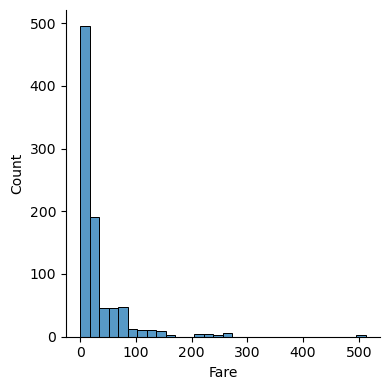

In [25]:
sns.displot(train['Fare'],bins=30,height=4)
plt.show()

티켓 가격의 최대값은 512£(파운드)였다. 압도적으로 비싼 VIP 등급의 티켓에 소수의 인원이 있고, 나머지 티켓은 300£ 이하이고, 약 20£ 이하의 티켓이 압도적으로 많은 것을 확인할 수 있다. 따라서 100£ 이하의 범주를 세분화하고, 나머지는 100 단위로 나눠보겠다.

In [28]:
test['Fare']=test['Fare'].fillna(test['Fare'].mode()[0])

In [29]:
fare_bins = [-1, 19, 39, 59, 79, 99, 199,299,550]
fare_labels = ['0-19', '20-39', '40-59', '60-79', '80-99', '100-199','200-299','VIP(500-)']
train['Fare_Category'] = pd.cut(train['Fare'], bins=fare_bins, labels=fare_labels)
test['Fare_Category']=pd.cut(test['Fare'],bins=fare_bins,labels=fare_labels)

In [30]:
sur_rate('Fare_Category')

,생존율(%),생존자 수,사망자 수,합계
0-19,27.0,137,370,507
20-39,45.2,90,109,199
40-59,51.6,32,30,62
60-79,50.0,20,20,40
80-99,80.0,24,6,30
100-199,75.8,25,8,33
200-299,64.7,11,6,17
VIP(500-),100.0,3,0,3


VIP 탑승객 3명은 전부 생존할 수 있었다. 그리고 티켓의 가격이 0~19£ 범위에 있는 사람은 제일 낮은 생존율을 보였다. 80£ 이상 티켓 가격을 지불한 탑승객의 생존율은 다른 티켓 가격에 비해 더욱 높은것을 확인할 수 있다.

<hr>

## 3. 맵핑
본격적으로 각 데이터들을 머신러닝을 돌리기 위해 숫자로 바꾸어 보겠다. 
* 필요 없는 Passenger ID, Ticket, Name과 Cabin열은 지우겠다.
* 범주를 나눈 Age, Fare열 또한 지우겠다.
* Fam으로 통합된 SibSp, Parch 열 또한 지우겠다.

In [32]:
train=train.drop(['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare','Cabin'],axis=1)
test=test.drop(['Name','Age','SibSp','Parch','Ticket','Fare','Cabin'],axis=1)
train.head()

,Survived,Pclass,Sex,Embarked,Fam,Age_Category,Fare_Category
0,0,3,male,S,1,20-29,0-19
1,1,1,female,C,1,30-39,60-79
2,1,3,female,S,0,20-29,0-19
3,1,1,female,S,1,30-39,40-59
4,0,3,male,S,0,30-39,0-19


* Sex에서 **male : 0, female : 1**
* Embarked에서 **S : 0, C : 1, Q :2**
* Age_Category에서 **'0-9':0, '10-19':1, '20-29':2, '30-39':3, '40-49':4, '50-59':5, '60-69':6, '70-':7**
* Fare_Category에서 **'0-19':0, '20-39':1, '40-59':2, '60-79':3, '80-99':4, '100-199':5,'200-299':6,'VIP(500-)':7**  
로 맵핑을 해보겠다.

In [33]:
Sex_mapping={'male':0,'female':1}
train['Sex']=train['Sex'].map(Sex_mapping)
test['Sex']=test['Sex'].map(Sex_mapping)

In [34]:
Embarked_mapping={'S':0,'C':1,'Q':2}
train['Embarked']=train['Embarked'].map(Embarked_mapping)
test['Embarked']=test['Embarked'].map(Embarked_mapping)

In [35]:
Age_mapping={'0-9':0, '10-19':1, '20-29':2, '30-39':3, '40-49':4, '50-59':5, '60-69':6, '70-':7}
train['Age_Category']=train['Age_Category'].map(Age_mapping)
test['Age_Category']=test['Age_Category'].map(Age_mapping)

In [36]:
Fare_mapping={'0-19':0, '20-39':1, '40-59':2, '60-79':3, '80-99':4, '100-199':5,'200-299':6,'VIP(500-)':7}
train['Fare_Category']=train['Fare_Category'].map(Fare_mapping)
test['Fare_Category']=test['Fare_Category'].map(Fare_mapping)

In [37]:
train.head()

,Survived,Pclass,Sex,Embarked,Fam,Age_Category,Fare_Category
0,0,3,0,0,1,2,0
1,1,1,1,1,1,3,3
2,1,3,1,0,0,2,0
3,1,1,1,0,1,3,2
4,0,3,0,0,0,3,0


In [38]:
test.head()

,PassengerId,Pclass,Sex,Embarked,Fam,Age_Category,Fare_Category
0,892,3,0,2,0,3,0
1,893,3,1,0,1,4,0
2,894,2,0,2,0,6,0
3,895,3,0,0,0,2,0
4,896,3,1,0,2,2,0


In [39]:
train_data=train.drop('Survived',axis=1)
target=train['Survived']
train_data.shape, target.shape

((891, 6), (891,))

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Pclass         891 non-null    int64   
 1   Sex            891 non-null    int64   
 2   Embarked       891 non-null    int64   
 3   Fam            891 non-null    int64   
 4   Age_Category   891 non-null    category
 5   Fare_Category  891 non-null    category
dtypes: category(2), int64(4)
memory usage: 30.4 KB


## 4. 모델링
모델링은 K-NN, 결정트리, 랜덤포레스트, 나이브베이즈, 서포트벡터머신 이렇게 5개를 돌려보겠다.

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=10,random_state=0,shuffle=True)

In [43]:
clf=KNeighborsClassifier(n_neighbors=13)
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.82222222 0.82022472 0.76404494 0.74157303 0.78651685 0.82022472
 0.74157303 0.80898876 0.79775281 0.7752809 ]


In [44]:
round(np.mean(score)*100,2)

78.78

**K-NN**의 점수는 **78.78점**이 나왔다.

In [45]:
clf=DecisionTreeClassifier()
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.77777778 0.82022472 0.73033708 0.79775281 0.87640449 0.76404494
 0.82022472 0.7752809  0.78651685 0.75280899]


In [46]:
round(np.mean(score)*100,2)

79.01

**결정트리**의 점수는 79.01점이 나왔다.

In [47]:
clf=RandomForestClassifier(n_estimators=13)
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.78888889 0.83146067 0.78651685 0.79775281 0.86516854 0.79775281
 0.80898876 0.75280899 0.78651685 0.80898876]


In [48]:
round(np.mean(score)*100,2)

80.25

**랜덤 포레스트**의 점수는 80.25점이 나왔다.

In [49]:
clf=GaussianNB()
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.81111111 0.80898876 0.76404494 0.74157303 0.74157303 0.7752809
 0.76404494 0.82022472 0.80898876 0.83146067]


In [50]:
round(np.mean(score)*100,2)

78.67

**나이브 베이즈**의 점수는 78.67점이 나왔다.

In [51]:
clf=SVC()
score=cross_val_score(clf,train_data,target,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)

[0.8        0.79775281 0.80898876 0.80898876 0.83146067 0.82022472
 0.79775281 0.83146067 0.82022472 0.84269663]


In [52]:
round(np.mean(score)*100,2)

81.6

**서포트 벡터 머신**의 점수는 **81.6점**이 나왔다.

## 5. 테스트

In [53]:
clf=SVC()
clf.fit(train_data, target)
test_data=test.drop("PassengerId",axis=1).copy()
prediction=clf.predict(test_data)

In [58]:
submission=pd.DataFrame({
    "PassengerId":test['PassengerId'],
    'Survived':prediction
    })
submission.to_csv(path_or_buf='/Users/gyol/Documents/Kaggle/titanic 2/submission.csv',index=False)

In [59]:
submission=pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
